In [1]:
#####Introduction to Deep Learning - Deep Learning basics with Python, TensorFlow and Keras####

# Tensorflow version

import tensorflow as tf
tf.__version__

'2.17.0'

In [2]:
# prepare our data, model it, and then train it
# let's load in this data

mnist=tf.keras.datasets.mnist #28x28 images of these hand-written digits

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Let's look at this actual data:

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

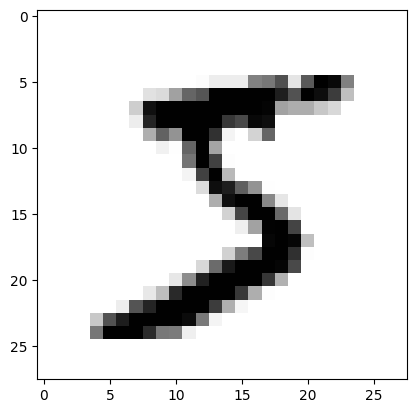

In [5]:
#we visualize this

import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [6]:
print(y_train[0])

5


In [7]:
#Each "pixel" is a feature, and each feature currently ranges from 0 to 255.
#Not quite 0 to 1. Let's change that with a handy utility function:

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

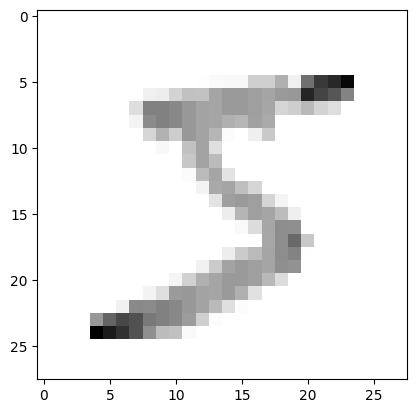

In [8]:
#Let's peak one more time:

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
#Now let's build our model!

model = tf.keras.models.Sequential()

In [10]:
#we need to take this 28x28 image, and make it a flat 1x784.
#There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

model.add(tf.keras.layers.Flatten())

In [11]:
# we want our hidden layers
#it's a densely-connected layer, meaning it's "fully connected,"
#where each node connects to each prior and subsequent node. Just like our image.

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [12]:
#Let's add another identical layer for good measure.

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [13]:
#Now, we're ready for an output layer:

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [14]:
#we pass the settings for actually optimizing/training the model we've defined.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Next, we have our loss metric.
#Now, we fit!

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8634 - loss: 0.4685
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1160
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0726


In [16]:
#As we train, we can see loss goes down (yay),
#and accuracy improves quite quickly to 98-99% (double yay!)

#we need to test on out-of-sample data

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9620 - loss: 0.1278
0.11309527605772018
0.9657999873161316


In [ ]:
#Finally, with your model, you can save it super easily:

#model.save('epic_num_reader.model')


In [ ]:
#Load it back:

#new_model = tf.keras.models.load_model('epic_num_reader.model')


In [17]:
#finally, make predictions!

predictions = model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[3.2554459e-09 3.7853831e-09 9.2394082e-08 ... 9.9999970e-01
  6.0950844e-09 4.9597059e-08]
 [1.8716836e-08 3.7763032e-04 9.9948877e-01 ... 5.5753265e-08
  7.4911691e-06 7.7998186e-10]
 [2.9740562e-07 9.9933428e-01 4.3880536e-05 ... 1.5470140e-04
  3.2648124e-04 2.6060277e-06]
 ...
 [1.2949476e-08 1.1099352e-07 6.6967132e-08 ... 7.4874173e-05
  1.7724582e-06 1.9573334e-04]
 [3.7275453e-07 8.0153825e-07 1.1896466e-07 ... 8.6209195e-07
  9.5597090e-04 2.3644533e-09]
 [1.0241002e-06 4.3209192e-07 1.3664276e-06 ... 2.1108372e-08
  5.3261573e-07 4.1121528e-09]]


In [18]:
#We can get the actual number pretty simply:

import numpy as np

print(np.argmax(predictions[0]))

7


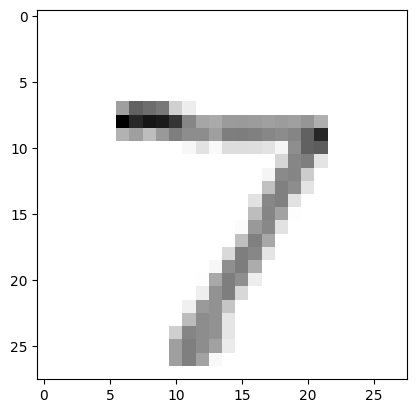

In [19]:
#There's your prediction, let's look at the input:

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [20]:
#Not binar

%matplotlib notebook

plt.imshow(x_test[0])

<IPython.core.display.Javascript object>